In [ ]:
import pandas as pd
#from gensim.parsing.preprocessing import remove_stopwords
import re
import joblib
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
# from sinlingua.preprocessor.stopword_remover import StopWordRemover
# from sinlingua.preprocessor.tokenizer import SinhalaTokenizer
# from sinlingua.preprocessor.stemmer import SinhalaStemmer

# from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/research/Data

/content/drive/My Drive/research/Data


In [ ]:
df = pd.read_csv('sinhala_df_new.csv')

In [ ]:
df.head()

comment_id     video_id  \
0  Ugzz230zOT68yh9cMSV4AaABAg  MvgHDsI8vus   
1  UgwEHhr8hjSq8nvra6V4AaABAg  iwt5Za4hlhM   
2  Ugy-XSwfOelLPdHcmSx4AaABAg  iwt5Za4hlhM   
3  UgyqiqIsvqzNF44z3Rl4AaABAg  mX8CN8OeZg4   
4  UgwwnIc2BScNpr8A6Mp4AaABAg  mX8CN8OeZg4   

                                         video_title  \
0  නොලැබීමට පරල වූ සෞඛ්‍ය වෘත්තීය සමිති...  "ඒ කා...   
1  හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...   
2  හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...   
3  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...   
4  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...   

                                                text             timestamp  \
0  ඉල්ලුමට සැපයුම අනුව පඩි හැදෙන්නෙ, නැතුව ත්‍රස්...  2024-03-28T07:52:38Z   
1  ඊලග  තයිපෝන්ගල්    උත්සවය  උපරිමයෙන්   සාර්ථක ...  2024-01-15T08:04:18Z   
2  තයිපෝන්ගල්    උත්සවය සාර්ථක වේවා sjb නායක තුමා...  2024-01-15T08:03:25Z   
3  මේ රටේ මහා සංඝරත්නයට සමගියෙන් ඉන්න බැරි උනාම ඔ...  2024-01-16T17:45:57Z   
4  ඔක්කොටම කලින් මහනායක හාමුදුරුවෝ තම තමන්ගේ ගම් ...  2024-01-15T08:52:32Z   

                    author              author_email reply_to     Label  \
0               @haZhPlays  UCSVBF5uqWvrNCUoiSXMzf-w      NaN  Negative   
1  @RupachandraAmarasinghe  UCWcb9Y8Cf_2WuRdSFJHuilg      NaN  Positive   
2  @RupachandraAmarasinghe  UCWcb9Y8Cf_2WuRdSFJHuilg      NaN  Positive   
3            @saroth.r7017  UCEHMFn3FOppO2N5zud9lEQA      NaN   Neutral   
4           @chagedara3045  UCb3kyne0li9Y1bEzJeZfvcQ      NaN  Negative   

      Domain   About  
0        Non     NaN  
1  Political  Sajith  
2  Political  Sajith  
3        Non     NaN  
4        Non     NaN

In [ ]:
df_temp = df[['video_title','text','Label','Domain','About']]

In [ ]:


df_temp = df_temp.dropna(subset=['About'])

In [ ]:

from sklearn.utils import shuffle

df_shuffled = shuffle(df_temp)
df_shuffled.head()

video_title  \
8108  නඩු තීන්දුව ගැන අහන්න එපා - කතෝලික සභාවෙන් සමා...   
8628  හිරු රාත්‍රී 9.55 ප්‍රධාන ප්‍රවෘත්ති ප්‍රකාශය ...   
4506  සජිත්ට ලැබෙන ඡන්ද ගාණ නාලක හරියටම කියයි | Hiru...   
569   ශ්‍රී ලංකාව ගැන නාසා ආයතනයෙන්.. ආන්දෝලනාත්මක හ...   
5996  රාජ්‍ය අමාත්‍ය සනත් නිශාන්ත අවසන් වරට සහභාගී ව...   

                                                   text     Label      Domain  \
8108  පිරිසකගේ සිත් සතුටු කරන්න නොදන්න කෙනෙක් වැරදි ...  negative           p   
8628                                    මාලිමාවට ජයවේවා  positive           p   
4506                            ජප්පොන්ට පට්ට අවුල්😂😂😂😂  negative           p   
569   දකුණේ එවුන් ඒක තමයි ලේසියෙන් හොරකම් කරන්නේ  😂😂...  Negative           P   
5996  &quot;නිවන් සුව ඇමතිතුමනි&quot; කියන්න නෙවෙයි ...  Negative  Politician   

                 About  
8108          Maithree  
8628               NPP  
4506               jvp  
569            Mahinda  
5996  Sanath Nishantha

In [ ]:

df_shuffled[]

SyntaxError: invalid syntax (<ipython-input-10-3f2e9b453deb>, line 1)

In [ ]:
df_temp.head(10)

video_title  \
1   හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...   
2   හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...   
18  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...   
23  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...   
27  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...   
31  ජනපති ස්විට්සර්ලන්තයට... වට මේස සාකච්ඡාවක් ගැන...   
32  ජනපති ස්විට්සර්ලන්තයට... වට මේස සාකච්ඡාවක් ගැන...   
33  ජනපති ස්විට්සර්ලන්තයට... වට මේස සාකච්ඡාවක් ගැන...   
36  ජනපති ස්විට්සර්ලන්තයට... වට මේස සාකච්ඡාවක් ගැන...   
37  ජනපති ස්විට්සර්ලන්තයට... වට මේස සාකච්ඡාවක් ගැන...   

                                                 text     Label     Domain  \
1   ඊලග  තයිපෝන්ගල්    උත්සවය  උපරිමයෙන්   සාර්ථක ...  Positive  Political   
2   තයිපෝන්ගල්    උත්සවය සාර්ථක වේවා sjb නායක තුමා...  Positive  Political   
18  තවම සැබෑ බෞද්ධ පාලකයෝ මේ රටේ බලයට ඇවිත් නෑ. ඒ...   Neutral  Political   
23  ආණ්ඩුව තමයි මේ වැඩ වල ඉන්න මුල් පුරුක් වල NGO ...  Negative  Political   
27  බෞද්ධ රටෙ නිති ක්‍රියාත්මක කරන්නෙ කොහොමද රටෙ ප...  Negative  Political   
31  පරිවර්තකයි අනවශ්‍ය අපේ ජනාධිපති .... ගොඩයන්ට ත...  Positive  Political   
32                                            සාතන්..  Negative  Political   
33  ලංකාවේ උන්ට වැට් ගහපු තෙල් වැඩි කරපු ඒවා..වියද...  Negative  Political   
36  ඔය වගේ, සාකච්ඡා වලට කය්ය නායකයිනට, මහින්දලට කත...  Positive  Political   
37  විස්කි රයිස් පයිස් එ්ම බොනව .කනව එ්ම . නොව් ...   Neutral  Political   

         About  
1       Sajith  
2       Sajith  
18    everyone  
23  Government  
27       Ranil  
31       Ranil  
32       Ranil  
33       Ranil  
36       Ranil  
37         JVP

In [ ]:
df['Combined'] = df['video_title'] + '.' + df['text']


In [ ]:

df = df[['Combined', 'Label']]
df.head()


Combined     Label
0  නොලැබීමට පරල වූ සෞඛ්‍ය වෘත්තීය සමිති...  "ඒ කා...  Negative
1  හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...  Positive
2  හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි... ජාතික ...  Positive
3  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...   Neutral
4  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...  Negative

In [ ]:
df['Label'] = df['Label'].replace(['Negative', 'negative','Negative ','negative ','negartive','Negativve','negaitve','Negatuve','negarive','ngative','negaive',], 'negative')
df['Label'] = df['Label'].replace(['Positive ', 'positive','postive','Positve','positve','Positive','Positiive','Poaitive'], 'positive')
df['Label'] = df['Label'].replace(['Neutral ', 'neutral','Netural','Neutal','neutal','Neutral'], 'neutral')

In [ ]:
df.Label.value_counts()

Label
negative    3877
positive     897
neutral      613
Name: count, dtype: int64

In [ ]:
pip install sinling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00


In [ ]:
from sinling import SinhalaTokenizer

tokenizer = SinhalaTokenizer()

In [ ]:
import re

def remove_emoji(string):
    if isinstance(string, str): # Check if the input is a string
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string)
    else:
        return string # Return the original value if it's not a string

df['Combined'] = df['Combined'].apply(remove_emoji)

In [ ]:
import re

def remove_urls(text):
  if isinstance(text, str): # Check if the input is a string
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
  else:
    return text # Return the original value if it's not a string

# Apply the function to the text column
df['Combined'] = df['Combined'].apply(remove_urls)

In [ ]:
import re

def clean_data(text):
    if isinstance(text, str): # Check if the input is a string
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs

        text = re.sub(r'<.*?>', '', text)     # Remove HTML tags

        text = re.sub(r'@\\w+', '', text)  # Remove mentions

        text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text) # Remove non-Sinhala characters (punctuation, numbers, etc.)
        return text
    else:
        return text # Return the original value if it's not a string

df['Combined'] = df['Combined'].apply(clean_data)

In [ ]:
df.shape

(12573, 2)

In [ ]:

# Assuming 'df' is your DataFrame
df = df.dropna(subset=['Label'])

In [ ]:
df.shape

(5387, 2)

In [ ]:
df.Label.value_counts()

Label
negative    3877
positive     897
neutral      613
Name: count, dtype: int64

In [ ]:
pip install sinlingua

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 94.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of sinlingua to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 116.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 16.6 MB/s eta 0:00:00


In [ ]:
from sinlingua.preprocessor.stopword_remover import StopWordRemover


In [ ]:
stopword_remover = StopWordRemover() # For removing stopwords


In [ ]:
df['cleaned'] = df['Combined'].astype(str).apply(lambda x: stopword_remover.remove_stop_words(x))
df['cleaned'] = df['cleaned'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
df.head()

Combined     Label  \
0  නොලැබීමට පරල වූ සෞඛ් ය වෘත්තීය සමිති      ඒ කා...  negative   
1  හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි    ජාතික ...  positive   
2  හින්දු බැතිමතුන් ජයටම තෛපොංගල් සමරයි    ජාතික ...  positive   
3  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...   neutral   
4  උතුම් බුදු දහමට එරෙහි බලවේග ගැන මහානායක හිමිවර...  negative   

                                             cleaned  
0  [නොලැබීමට, පරල, වූ, සෞඛ්, වෘත්තීය, සමිති, කාලය...  
1  [හින්දු, බැතිමතුන්, ජයටම, තෛපොංගල්, සමරයි, ජාත...  
2  [හින්දු, බැතිමතුන්, ජයටම, තෛපොංගල්, සමරයි, ජාත...  
3  [උතුම්, බුදු, දහමට, එරෙහි, බලවේග, මහානායක, හිම...  
4  [උතුම්, බුදු, දහමට, එරෙහි, බලවේග, මහානායක, හිම...

#Undersampling

In [ ]:
df.Label.value_counts()

Label
negative    3877
positive     897
neutral      613
Name: count, dtype: int64

In [ ]:
df_positive = df[df['Label'] == 'positive'].sample(n = 897, random_state = 42)
df_negative = df[df['Label'] == 'negative'].sample(n = 897, random_state = 42)

In [ ]:
df = pd.concat([df_negative, df_positive])

In [ ]:

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Random Forest

In [ ]:
# Step 3: Vectorize Text
vectorizer = TfidfVectorizer()
df['cleaned_text'] = df['cleaned'].apply(lambda x: ' '.join(x))

X = vectorizer.fit_transform(df['cleaned_text'])  # Use the new 'cleaned_text' column
y = df['Label']
# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7576601671309192

Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.75      0.77       193
    positive       0.73      0.77      0.74       166

    accuracy                           0.76       359
   macro avg       0.76      0.76      0.76       359
weighted avg       0.76      0.76      0.76       359



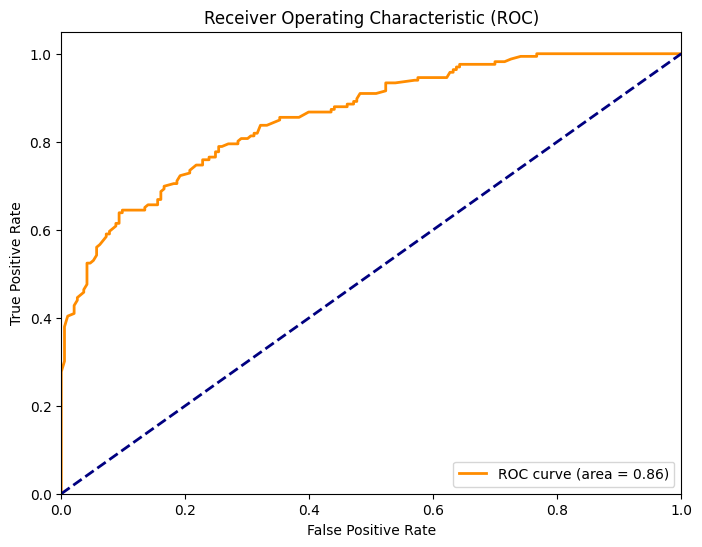

In [ ]:

# Step 7: Predict probabilities for ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 8: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='positive') # Assuming 'positive' is your positive class
roc_auc = auc(fpr, tpr)


# Step 9: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#SVM

SVM Accuracy: 0.7910863509749304

SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.79      0.80       193
    positive       0.76      0.80      0.78       166

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359



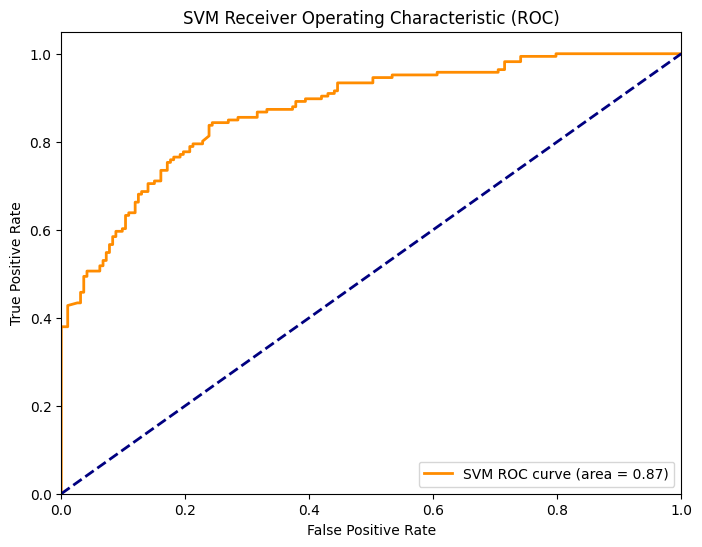

In [ ]:

# SVM Model
svm_model = SVC(probability=True) # Enable probability estimates for ROC curve
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

# Predict probabilities for the ROC curve
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for SVM
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs, pos_label='positive')
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label=f'SVM ROC curve (area = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Step 5: Train XGBoost Classifier
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training data and transform it
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Transform the test data using the same encoder

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train_encoded) # Use the encoded y_train

# ... (rest of your code) ...

# When evaluating, make sure to use the encoded y_test as well:
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, xgb_pred)) # Use y_test_encoded
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, xgb_pred)) # Use y_test_encoded

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:47:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7632311977715878

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       193
           1       0.73      0.78      0.75       166

    accuracy                           0.76       359
   macro avg       0.76      0.76      0.76       359
weighted avg       0.77      0.76      0.76       359



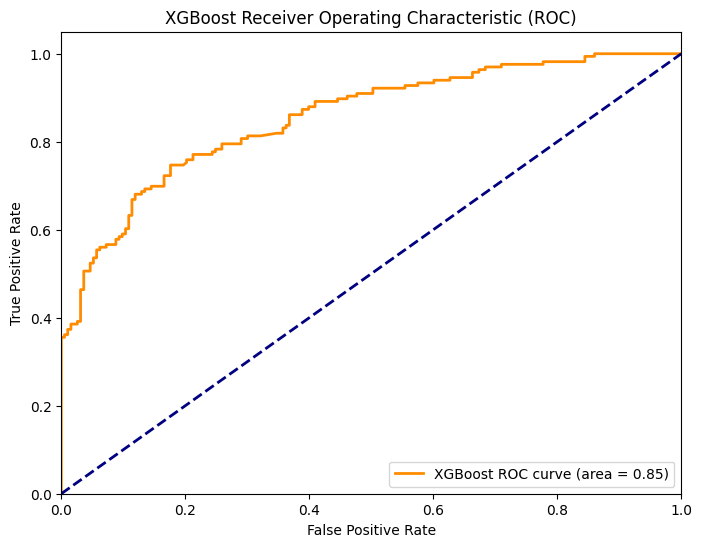

In [ ]:

# Predict probabilities for the ROC curve
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for XGBoost
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test_encoded, xgb_probs)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Naive Bayes Accuracy: 0.7827298050139275

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.74      0.78       193
    positive       0.73      0.84      0.78       166

    accuracy                           0.78       359
   macro avg       0.79      0.79      0.78       359
weighted avg       0.79      0.78      0.78       359



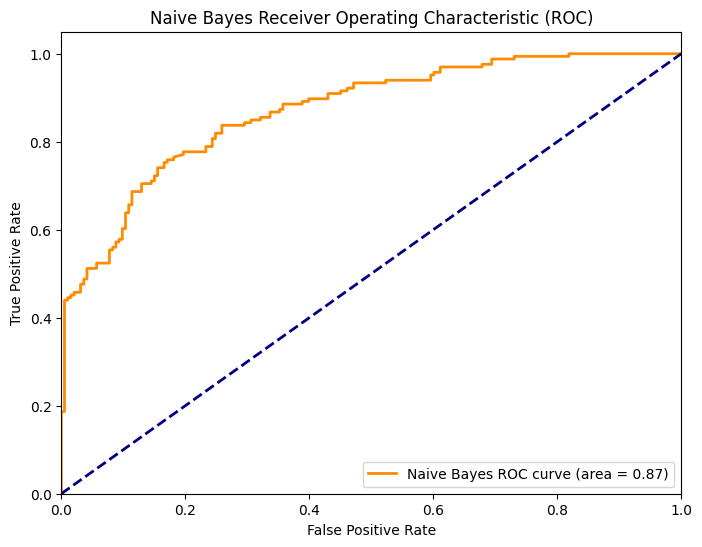

In [ ]:

# Step 5: Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Step 7: Predict probabilities for ROC Curve
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


# Step 8: Compute ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb, pos_label='positive') # Assuming 'positive' is your positive class
roc_auc_nb = auc(fpr_nb, tpr_nb)


# Step 9: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

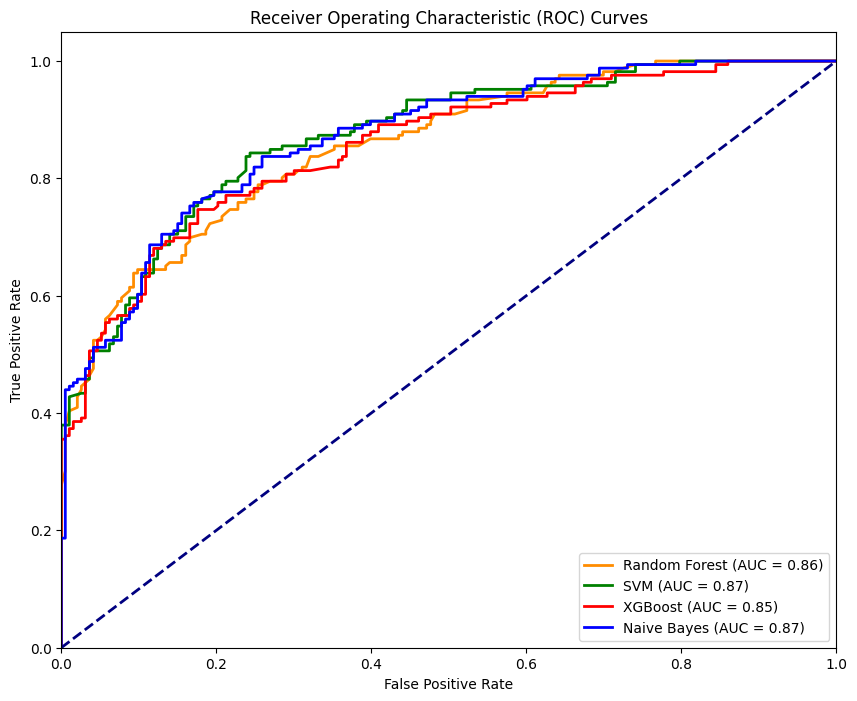

In [ ]:

plt.figure(figsize=(10, 8))

# Plot each ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 82.6 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2178315b1a5d566a357014fd9411d3e9ed1c239c79da422b0b13f8e2923f8a53
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sinlingua 0.1.8 requires numpy==

In [ ]:
from lime.lime_text import LimeTextExplainer
import numpy as np

# Step 1: Initialize the LIME Explainer
explainer = LimeTextExplainer(class_names=model.classes_)

# Step 2: Define a Function to Predict Probabilities
# This function uses the trained model and the vectorizer to predict probabilities for raw text
def predict_proba(texts):
    X_transformed = vectorizer.transform(texts)
    return model.predict_proba(X_transformed)

# Step 3: Choose an Instance to Explain
instance_index = 2  # Change this to explain different instances
text_to_explain = df['cleaned_text'].iloc[instance_index]
true_label = df['Label'].iloc[instance_index]

# Step 4: Generate Explanation
explanation = explainer.explain_instance(
    text_to_explain,
    predict_proba,
    num_features=10
)

# Step 5: Visualize the Explanation
print(f"Instance to Explain: {text_to_explain}")
print(f"True Label: {true_label}")
explanation.show_in_notebook(text=True)



Instance to Explain: ප් රසන්න පොහොට්ටුව යයිද ණය ගෙවන්නැතිව අවුරුදු දෙකක් සල්ලි වලින් අපිට පොඩි ආතල් එකක් දෙනව මිනිස්සු ඕවට රැවටෙන්නෑ මොනව උනත් ප් රසන්න හොදටම බයවෙලා ඉන්නෙ මාලිමවට ඊලග ජනාධිපති අනුර කුමාර දිසානායක මහතා ස්තීරයි
True Label: positive


In [ ]:

from sklearn.pipeline import make_pipeline # Import make_pipeline

pipeline = make_pipeline(vectorizer, model) # Use the defined 'vectorizer' variable instead of 'tfidf_vectorizer'

In [ ]:
from sinling import SinhalaTokenizer

import lime.lime_text

tokenizer = SinhalaTokenizer()

def custom_tokenizer(text):
    return tokenizer.tokenize(text)

explainer = lime.lime_text.LimeTextExplainer(
    class_names=model.classes_,
    split_expression=custom_tokenizer
)


exp = explainer.explain_instance(
    text_to_explain,
    pipeline.predict_proba,
    num_features=10
)
# exp.show_in_notebook(text=False)

print(f"Instance to Explain: {text_to_explain}")
print(f"True Label: {true_label}")
exp.show_in_notebook(text=True)

Instance to Explain: ප් රසන්න පොහොට්ටුව යයිද ණය ගෙවන්නැතිව අවුරුදු දෙකක් සල්ලි වලින් අපිට පොඩි ආතල් එකක් දෙනව මිනිස්සු ඕවට රැවටෙන්නෑ මොනව උනත් ප් රසන්න හොදටම බයවෙලා ඉන්නෙ මාලිමවට ඊලග ජනාධිපති අනුර කුමාර දිසානායක මහතා ස්තීරයි
True Label: positive


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Step 6: Evaluate Model (add these lines after the existing evaluation code)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

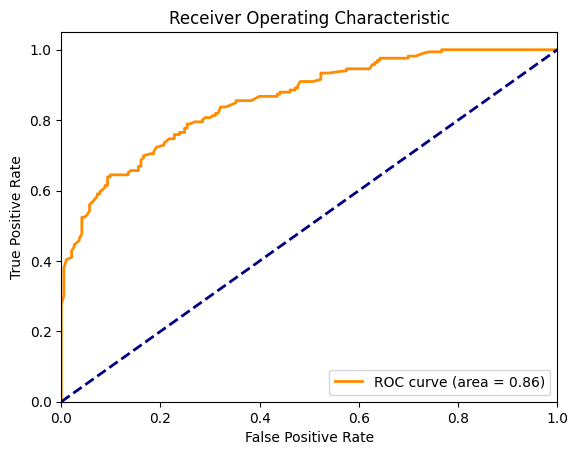

In [ ]:


# Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='positive')  # Assuming 'positive' is the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
# Step 5: Train SVM Classifier
svm_model = SVC(probability=True, random_state=42) #Enable probability estimates for ROC curve
svm_model.fit(X_train, y_train)

# Step 6: Evaluate SVM Model
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

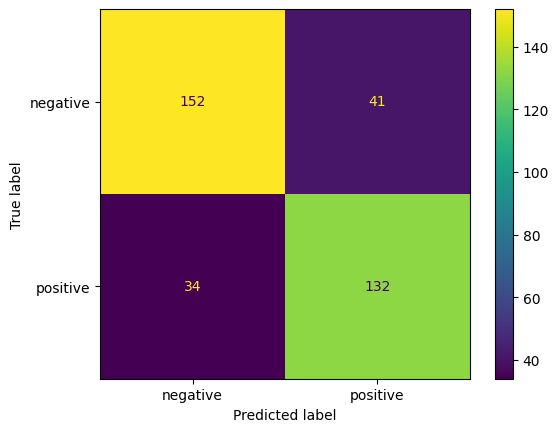

In [ ]:
#Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot()
plt.show()


In [ ]:
# ROC Curve and AUC for SVM
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm, pos_label='positive')
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#LIME for SVM
from sklearn.pipeline import make_pipeline

pipeline_svm = make_pipeline(vectorizer, svm_model)

explainer_svm = LimeTextExplainer(class_names=svm_model.classes_)

exp_svm = explainer_svm.explain_instance(
    text_to_explain,
    pipeline_svm.predict_proba,
    num_features=10
)

print(f"Instance to Explain: {text_to_explain}")
print(f"True Label: {true_label}")
exp_svm.show_in_notebook(text=True)

In [ ]:
from sinling import SinhalaTokenizer

import lime.lime_text
pipeline = make_pipeline(vectorizer, svm_model)
tokenizer = SinhalaTokenizer()

instance_index = 4
text_to_explain = df['cleaned_text'].iloc[instance_index]
true_label = df['Label'].iloc[instance_index]


def custom_tokenizer(text):
    return tokenizer.tokenize(text)

explainer = lime.lime_text.LimeTextExplainer(
    class_names=model.classes_,
    split_expression=custom_tokenizer
)


exp = explainer.explain_instance(
    text_to_explain,
    pipeline.predict_proba,
    num_features=10
)
# exp.show_in_notebook(text=False)

print(f"Instance to Explain: {text_to_explain}")
print(f"True Label: {true_label}")
exp.show_in_notebook(text=True)

In [ ]:

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7827298050139275

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.74      0.78       193
    positive       0.73      0.84      0.78       166

    accuracy                           0.78       359
   macro avg       0.79      0.79      0.78       359
weighted avg       0.79      0.78      0.78       359



In [ ]:


# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
disp_nb.plot()
plt.show()

In [ ]:


# ROC Curve and AUC for Naive Bayes
y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb, pos_label='positive')
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


In [ ]:

from sklearn.pipeline import make_pipeline

pipeline_nb = make_pipeline(vectorizer, nb_classifier)

explainer_nb = LimeTextExplainer(class_names=nb_classifier.classes_)

exp_nb = explainer_nb.explain_instance(
    text_to_explain,
    pipeline_nb.predict_proba,
    num_features=10
)

print(f"Instance to Explain: {text_to_explain}")
print(f"True Label: {true_label}")
exp_nb.show_in_notebook(text=True)

pipeline = make_pipeline(vectorizer, nb_classifier)
tokenizer = SinhalaTokenizer()

instance_index = 4  # Change this to explain different instances
text_to_explain = df['cleaned_text'].iloc[instance_index]
true_label = df['Label'].iloc[instance_index]


def custom_tokenizer(text):
    return tokenizer.tokenize(text)

explainer = lime.lime_text.LimeTextExplainer(
    class_names=nb_classifier.classes_,
    split_expression=custom_tokenizer
)


exp = explainer.explain_instance(
    text_to_explain,
    pipeline.predict_proba,
    num_features=10
)
# exp.show_in_notebook(text=False)

print(f"Instance to Explain: {text_to_explain}")
print(f"True Label: {true_label}")
exp.show_in_notebook(text=True)

#XGBOOST Algorithm


In [ ]:
df.head()

Combined     Label  \
0  ශ් රී ලංකාව ගැන නාසා ආයතනයෙන්   ආන්දෝලනාත්මක හ...  positive   
1  කහවත්ත කතගේ මළ සිරුර ගැන සැකයක්    කොහොමද  සිත...  negative   
2  ප් රසන්න පොහොට්ටුව හැර යයිද                   ...  positive   
3              ශ් රී ලංකාවේ     ක් රිකට් තහනම සහ ...  negative   
4  රංජිත් දිසානායක    පනස් වසරක් සපුරන හැත්තෑ එකේ...  positive   

                                             cleaned  \
0  [ශ්, රී, ලංකාව, නාසා, ආයතනයෙන්, ආන්දෝලනාත්මක, ...   
1  [කහවත්ත, කතගේ, මළ, සිරුර, සැකයක්, කොහොමද, සිතක...   
2  [ප්, රසන්න, පොහොට්ටුව, යයිද, ණය, ගෙවන්නැතිව, අ...   
3  [ශ්, රී, ලංකාවේ, රිකට්, තහනම, අනාගත, සැලසුම්, ...   
4  [රංජිත්, දිසානායක, පනස්, වසරක්, සපුරන, හැත්තෑ,...   

                                        cleaned_text  
0  ශ් රී ලංකාව නාසා ආයතනයෙන් ආන්දෝලනාත්මක හෙළිදරව...  
1  කහවත්ත කතගේ මළ සිරුර සැකයක් කොහොමද සිතක් පහල ව...  
2  ප් රසන්න පොහොට්ටුව යයිද ණය ගෙවන්නැතිව අවුරුදු ...  
3  ශ් රී ලංකාවේ රිකට් තහනම අනාගත සැලසුම් රවීන් වි...  
4  රංජිත් දිසානායක පනස් වසරක් සපුරන හැත්තෑ එකේ අර...

In [ ]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['Label'])

X = df['cleaned_text']
y = df['label_encoded']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:10:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

    negative       0.80      0.75      0.77       193
    positive       0.73      0.78      0.75       166

    accuracy                           0.76       359
   macro avg       0.76      0.76      0.76       359
weighted avg       0.77      0.76      0.76       359



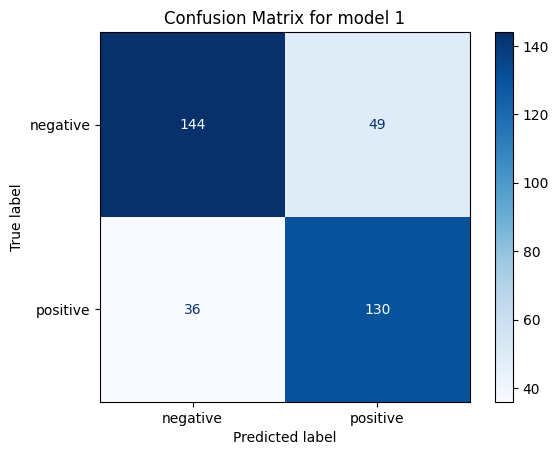

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for model 1")
plt.show()